# Большое практическое задание 1
# Классификация изображений цифр метрическими методами

## курс "Машинное обучение 1", программа OzonMasters, 2021

## Студент: Султонов Азамат

## Введение

Данное задание направлено на ознакомление с метрическими алгоритмами классификации, а также методами работы с изображениями. В задании вам будет необходимо:

1. Написать на языке Python собственные реализации метода ближайших соседей и кросс-валидации. Реализации должны соответствовать спецификации, описанной в прилагающихся модулях.     
    Частично проверить правильность выполнения своих реализаций можно с помощью системы ejudge в соответствующем соревновании.
    **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения.


2. Провести описанные ниже эксперименты с датасетом изображений цифр MNIST, описать полученые результаты и ответить на предложенные вопросы.


3. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно.

    **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать:
    `File -> Download as -> HTML (.html).`
    Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de).
Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями.

    Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.

### Некоторые полезные советы

1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль `knn`, можно добавить ячейку с таким содержимым:
     
```
    %load_ext autoreload
    
    %autoreload 2
```
   
2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `knn` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:

```
    tree
    ---knn
    ------__init__.py
    ------classification.py
    ------distances.py
    ------model_selection.py
    ------nearest_neighbors.py
    ---tests
    ------__init__.py
    ------test_classification.py
    ------test_distances.py
    ------test_model_selection.py
    ------test_nearest_neigbours.py
    experiments.ipynb
```

## Реализация алгоритмов (10 баллов)

Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить
все выданные тесты. Задание, не проходящее все выданные тесты, приравнивается к невыполненному. При
написании **необходимо пользоваться** стандартными средствами языка Python и библиотекой numpy. Библиотеками scipy и scikit-learn пользоваться **запрещено**, если это не обговорено отдельно в пункте задания. Для
экспериментов в бонусной части разрешается пользоваться любыми открытыми библиотеками, реализующими
алгоритмы обработки изображений.

Среди предоставленных файлов должны быть следующие модули и функции в них

1. Модуль `knn.distances` с реализацией функции для вычисления расстояния:
    1. `euclidean_distance(X, Y)` — реализация евклидова расстояния с заданными свойствами;
    2. `cosine_distance(X, Y)` — реализация косинусного расстояния с заданными свойствами;


2. Модуль `knn.nearest_neighbors`, содержащий собственную реализацию поиска ближайших соседей.
    
    Класс `NearestNeighborsFinder` с методами:
      1. `__init__(self, n_neighbors, metric="euclidean")` — конструктор (инициализатор) класса;
      2. `fit(self, X, y=None)` — обучение алгоритма;
      3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей.


3. Модуль `knn.classification`, содержащий собственную реализацию классификатора на основе метода ближайших соседей.

    Класс `KNNClassifier` с методами:
    
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’)` — конструктор (инициализатор) класса;
    2. `fit(self, X, y=None)` — обучение алгоритма;
    3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей;
    4. `predict(self, X)` — редсказание на новых данных;
    5. `_predict_precomputed(self, indices, distances)` — вспомогательный метод.
    
   Класс `BatchedKNNClassifier`, полезный для работы с большими выборками, с методами:
   
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’, batch_size=None)` — конструктор (инициализатор) класса
    2. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей, разбитый на несколько итераций по батчам
    3. `set_batch_size(self, batch_size)` — метод для выставления нового значения размера батча


4. Модуль `knn.model_selection` с реализациями функций для применения кросс-валидации:

    1. `knn_cross_val_score(X, y, k_list, scoring, cv=None, **kwargs)` — функция для измерения качества на кросс-валидации.

Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые unit-тесты, которые находятся рядом с модулем `knn` в директории `tests` Чтобы запустить тесты в консоли требуется выполнить одну из команд:


```
$ python -m unittest                            # запуск всех тестов
$ python -m unittest tests/test_distances.py    # запуск конкретных тестов
```

## Эксперименты (15 баллов)

Здесь вы можете заимпортировать всё, что вам потребуется для экспериментов:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from knn.distances import euclidean_distance, cosine_distance 
from knn.classification import BatchedKNNClassifier
from knn.model_selection import knn_cross_val_score

### 1. Загрузка даннных

Эксперименты этого задания необходимо проводить на датасете MNIST. Загрузить датасет можно при помощи функции `sklearn.datasets.fetch_openml("mnist_784")` или скачать вручную с сайта
http://yann.lecun.com/exdb/mnist/. Датасет необходимо разбить на обучающую выборку (первые 60 тыс.
объектов) и тестовую выборку (10 тыс. последних объектов).

In [2]:
X, y = datasets.fetch_openml('mnist_784', version=1, cache=True, return_X_y=True)
X = X.to_numpy()
y = y.to_numpy(dtype=int)

In [3]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

### 2. Исследование скорости методов поиска (4 балла)

Исследуйте, какой алгоритм поиска ближайших соседей будет быстрее работать в различных ситуациях.

Измерьте для каждого алгоритма поиска (`kd_tree`, `ball_tree`, `brute` и `my_own`) время нахождения 5 ближайших соседей для каждого объекта тестовой выборки по евклидовой метрике. Выберите подмножество признаков, по которому будет считаться расстояние, размера 10, 20, 100 (подмножество признаков выбирается один раз для всех объектов, случайно).

**Замечание.** Для оценки времени долго работающих функций можно пользоваться либо функциями из
модуля time, либо magic-командой %time, которая запускает код лишь один раз.

In [4]:
def get_random_features(size, number_of_features):
    return np.sort(np.random.choice(range(number_of_features),size=size, replace=False))
    
features_10  = get_random_features(10,  X.shape[1])
features_20  = get_random_features(20,  X.shape[1])
features_100 = get_random_features(100, X.shape[1])

n_neighbors = 5
algorithms = ['kd_tree', 'ball_tree', 'brute', 'my_own']

for algorithm in algorithms:
    print(' ________________________________________')
    print('|algorithm|', algorithm)
    print('|_________|______________________________')
    model = BatchedKNNClassifier(n_neighbors=n_neighbors, algorithm=algorithm)
    for number_of_features in [10, 20, 100]:
        print('number of features:', number_of_features)
        features = eval('features_%d' % number_of_features)
        model.fit(X_train[features])
        X_test_ = X_test[features]
        %timeit model.kneighbors(X_test_, return_distance=True)
        print('----------')

 ________________________________________
|algorithm| kd_tree
|_________|______________________________
number of features: 10
825 µs ± 246 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
----------
number of features: 20
1.21 ms ± 288 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
----------
number of features: 100
21.3 ms ± 242 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
----------
 ________________________________________
|algorithm| ball_tree
|_________|______________________________
number of features: 10
608 µs ± 161 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
----------
number of features: 20
1.01 ms ± 265 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
----------
number of features: 100
13.3 ms ± 3.48 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
----------
 ________________________________________
|algorithm| brute
|_________|______________________________
number of features: 10
540 µs ± 99.7 µs per loop (mean

#### Приведите график / таблицу с результатами вашего эксперимента

|              | kd_tree | ball_tree | brute | my_own |
|--------------|---------|-----------|-------|--------|
| 10 features  | 0.955   | 0.726     | 0.563 | 0.208  |
| 20 features  | 1.49    | 1.3       | 0.716 | 0.509  |
| 100 features | 15.9    | 13.6      | 2.64  | 2.31   |

Замечание. Время в миллисекундах (ms)

#### Ответьте на следующие вопросы

1. Какой алгоритм сработал быстрее всего для каждого из размера подвыборок? Ожидали ли вы такие результаты до проведения эксперимента?

   для 10 признаков: my_own\
   для 20 признвков: my_own\
   для 100 признаков: my_own
   
   Результат был ожидаем, так как при малом числе признаков обычно более простые алгоритмы работают лучше.

2. Приведите теоретическую сложность каждого из алгоритмов поиска. Согласуется ли время работы алгоритмов на практике с их теоретической вычислительной сложностью? Как вы думаете, почему?
    
   $kd\_tree: O(D\log N)$ при $D \leq 20$, $O(DN)$ при $D > 20$\
   $ball\_tree: O(D\log N)$\
   $brute:\ O(DN)$\
   $my\_own: O(DN)$\
   $N - n_{samples},\ D - n_{features}$.\
   Время работы алгоритмов на практике не согласуется с их теоретической вычислительной сложностью (при увеличении $D$ в 5 раз время $kd\_tree$ и $ball\_tree$ увеличивается в ~10 раз; $my\_own$ и $brute$ близки к теоретическим). Возможно, дело в том, что при 10 и 20 признаках матрица объектов сильно разрежена (так как пикселей с нулевой интенсивностью гораздо больше), поэтому время запроса $kd\_tree$ и $ball\_tree$ достаточно мала. А при 100 признаках матрица объектов становится плотнее, что увеличивает время запроса. То есть при увеличении числа признаков увеличивается также и плотность матрицы.
   
   

3. Какой алгоритм исходя из результатов эксперимента следует использовать в дальнейшем? Выберите алгоритм поиска соседей, который вы будете использовать во всех экспериментах ниже. 
    
    Из таблицы видно, что при увеличении числа признаков $brute$ растёт медленнее, и при 784 признаках будет работать быстрее других алгоритмов.

### 3. Исследование зависимости точности алгоритма на кросс-валидации (4 балла)


Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) алгоритма k ближайших соседей в зависимости от следующих факторов:
* количество соседей k от 1 до 10
* используется евклидова или косинусная метрика

In [5]:
algorithm = 'brute'
metrics =['euclidean', 'cosine']

cv = KFold(n_splits=3)
cv_res = {}
for metric in metrics:
    cv_res[metric] = knn_cross_val_score(X, y, range(1, 11), 'accuracy', cv=cv, algorithm=algorithm, metric=metric)        

#### Нарисуйте график зависимости точности от количества соседей по каждой метрике

In [6]:
euclidean_accuracy = [cv_res['euclidean'][k].mean() for k in sorted(cv_res['euclidean'])]
cosine_accuracy = [cv_res['cosine'][k].mean() for k in sorted(cv_res['cosine'])]
best_unweighted_model_accuracy = max(cosine_accuracy)

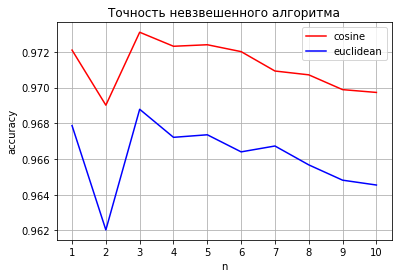

In [7]:
plt.title('Точность невзвешенного алгоритма')
plt.grid()
plt.xlabel('n')
plt.ylabel('accuracy')
plt.plot(range(1, 11), cosine_accuracy, color='r', label='cosine')
plt.plot(range(1, 11), euclidean_accuracy, color='b', label='euclidean')
plt.xticks(range(1,11))
plt.legend()
plt.show()

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор (например, если у вас несколько наборов параметров с высоким качеством, обоснуйте как вы выберите среди этих наборов один).

   Согласно графику, наиболее оптимальными являются параметры: metric = 'cosine', n_neighbors = 3


2. Какая метрика лучше себя показала в экспериментах? Можете ли вы объяснить, почему?

    Лучше метрика 'cosine', так как в этой задаче важнее "сонаправленность" векторов, а не евклидово расстояние между ними. Допустим, есть два сонаправленных вектора разной длины. Это означает, что рисунки, кодируемые этими векторами идентичны по форме, но различна интенсивность пикселей. Разумно считать расстояние между этими векторами равным нулю (что и получается при использовании косинусной метрики. А при использовании евклидовой метрики расстояние между ними будет больше нуля).
    
   
2. Есть ли на графике зависимости точности от количество соседей "выбросы", резкие падения/повышения качества для одного значения k по сравнению с соседними? Если да, предположите причину появления этих выбросов.

    Выбросы есть: $1 \rightarrow 2,\ 2 \rightarrow 3$.\
    При переходе от одного к двум соседям точность резко падает потому, что есть проблема пар похожих цифр ($3$ и $9$, $8$ и $9$, $4$ и $1$ и т.д.), поэтому при двух соседях возрастает неопределённость в выборе. Например, для $9$ двумя ближайшими соседями могут оказаться $9$ и $3$.\
    При переходе от двух к трём соседям точность резко возрастает потому, что:\
    1) видимо, нивелируется проблема, описанная для случая двух соседей (из-за этого происходит резкий скачок ввех);\
    2) увеличение точности за счёт увеличения числа соседей (из-за это точность чуть выше, чем при $n=1$).

### 3. Исследование зависимости точности взвешенного алгоритма на кросс-валидации (4 балла)

По результатам предыдущего эксперимента выберите метрику, которую вы будете использовать в этом эксперименте.

Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) взвешенного алгоритма k ближайших соседей в зависимости от количество соседей k (от 1 до 10).

Голос объекта положите равным `1 / (distance + eps)`, где `eps` = `1e-5`.

In [8]:
metric = 'cosine'
weights = 'distance'
batch_size = 69

cv_res_weights = knn_cross_val_score(X, y, range(1, 11), 'accuracy', cv=cv, algorithm=algorithm, metric=metric, weights=weights)

In [9]:
accuracy = [cv_res_weights[acc].mean() for acc in sorted(cv_res_weights)]
best_weighted_model_accuracy = max(accuracy)
print('Точность лучшей невзвешенной модели:', best_unweighted_model_accuracy)
print('Точность лучшей взвешенной модели:  ', best_weighted_model_accuracy)


Точность лучшей невзвешенной модели: 0.9730999806015425
Точность лучшей взвешенной модели:   0.9740999801937931


#### Нарисуйте график зависимости точности от количества соседей 

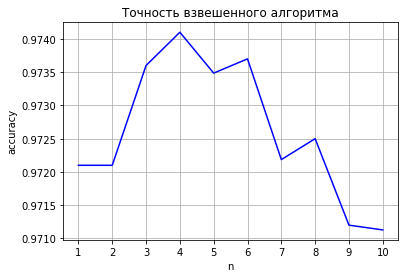

In [10]:
accuracy = [cv_res_weights[acc].mean() for acc in sorted(cv_res_weights)]
plt.title('Точность взвешенного алгоритма')
plt.grid()
plt.xlabel('n')
plt.ylabel('accuracy')
plt.xticks(range(1,11))
plt.plot(range(1,11), accuracy, color='b', label='lolo')
plt.show()

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор.
   
   Из графика следует, что оптимальным числом соседей явяется $n_{neighbors} = 4$.


2. Сравните результаты взвешенного алгоритма с невзвешенным. Объясните разницу/отсутствие разницы в результатах.

   Точность лучшей невзвешенной модели: 0.9730999806015425.\
   Точность лучшей взвешенной модели:   0.9740999801937931.\
   Взвешенный алгоритм лучше, потому что разумно, чтобы более близкие соседи имели больший вес.

### 4. Применение алгоритма и интерпретация ошибок (3 балла)

1. Примените лучший алгоритм к исходной обучающей и тестовой выборке и посчитайте точность классификации. Сравните с точностью по кросс-валидации. Опишите ваши результаты.

In [11]:
model = BatchedKNNClassifier(n_neighbors=4, metric='cosine', weights='distance', batch_size=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)

In [12]:
score

0.9752

accuracy_score = 0.9752 (чуть выше точности по кросс-валидации).\
Лучшие параметры:\
metric = 'cosine',\
weights = 'distance',\
n_neighbors = 4.

2. Постройте и проанализируйте матрицу ошибок (confusion matrix), используйте функцию `sklearn.metrics.confusion_matrix`. Визуализируйте несколько объектов из тестовой выборки, на которых были допущены ошибки. Проанализируйте и укажите их общие черты.

In [13]:
confusion_matrix(y_test, y_pred)

array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1129,    3,    1,    0,    0,    2,    0,    0,    0],
       [   8,    0, 1009,    1,    1,    0,    0,    8,    5,    0],
       [   0,    1,    3,  976,    1,   12,    0,    4,    9,    4],
       [   2,    1,    0,    0,  946,    0,    6,    2,    0,   25],
       [   4,    0,    0,    9,    1,  863,    7,    1,    4,    3],
       [   3,    3,    0,    0,    1,    3,  948,    0,    0,    0],
       [   2,   10,    4,    0,    1,    0,    0,  998,    0,   13],
       [   7,    1,    2,    9,    3,    3,    5,    4,  936,    4],
       [   7,    7,    2,    5,    7,    3,    1,    4,    3,  970]],
      dtype=int64)

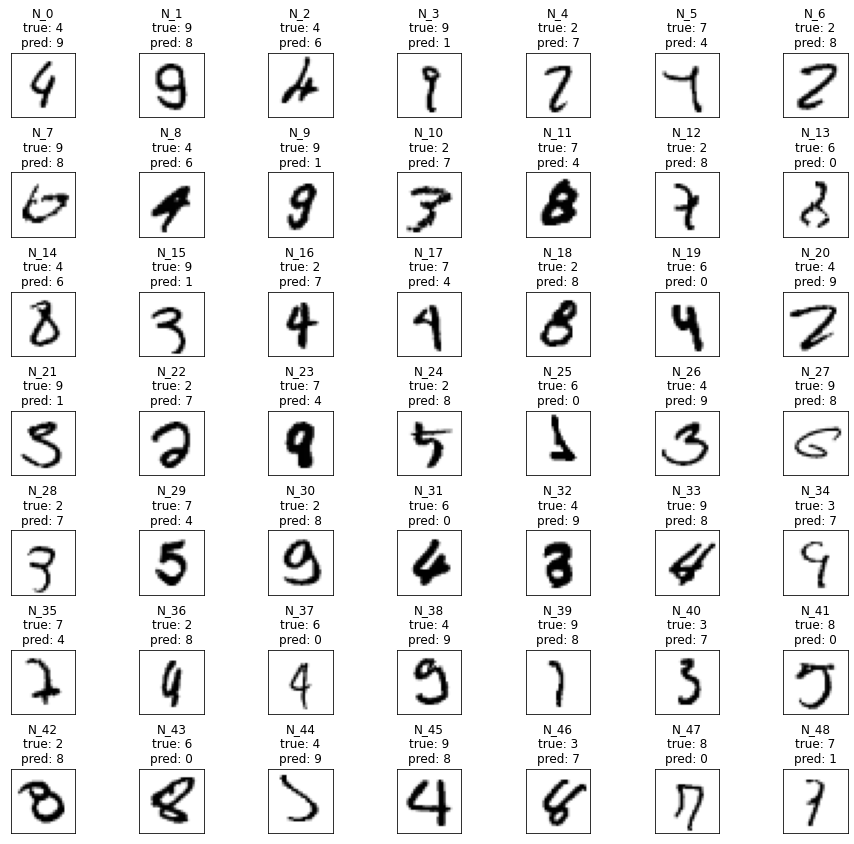

In [14]:
def plot_mnist(images, y_true, y_pred, N, M):
    fig, ax = plt.subplots(N, M, figsize=(15, 15))
    for i in range(N):
        for j in range(M):
            ax[i, j].imshow(images[M*i+j].reshape(-1, 28), cmap='gray_r')
            title = str('N_%d\ntrue: %d\npred: %d' % (M*i+j, y_true[i+j], y_pred[i+j]))
            ax[i ,j].set_title(title)
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
    plt.subplots_adjust(wspace=1, hspace=0.2)
    plt.show()

mistakes = (y_pred != y_test)
plot_mnist(X_test[mistakes], y_test[mistakes], y_pred[mistakes], 7, 7)

Изображения, на которых допущена ошибка, можно разбить на несколько групп:
1. изображения, имеющие неверные метки (N_10, N_11, N_14, N_16, N_18, N_19, N_24, N_26, N_29, ...)
2. истинная метка и предсказанная метка образуют пары похожих цифр: (3, 9), (1, 4), (1, 7), ...
3. перевёрнутые, зашумлённые изображения (N_7, N_13, N_27, N_34, ...)
4. совершенно непонятные каракули (N_25, N_44, N_46, N_47)




## Бонус 1. Размножение обучающей выборки (3 балла)

Размножьте обучающую выборку с помощью поворотов, смещений, применений гауссовского фильтра и морфологических операций. Разрешается использовать библиотеки для работы с изображениями. Подобрать по кросс-валидации с 3 фолдами параметры преобразований. Рассмотреть следующие параметры для преобразований и их комбинации:
1. Величина поворота: 5, 10, 15 (в каждую из двух сторон)
2. Величина смещения: 1, 2, 3 пикселя (по каждой из двух размерностей)
3. Дисперсия фильтра Гаусса: 0.5, 1, 1.5
4. Морфологические операции: эрозия, дилатация, открытие, закрытие с ядром 2

Проанализируйте, как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

**Замечание.** Не обязательно хранить все обучающие выборки в процессе эксперимента. Достаточно вычислить ближайших соседей по каждой из выборок, а затем выбрать из них ближайших соседей.

**Замечание по дизайну эксперимента**. В этой части вам предлагается самим выбрать дизайн эксперимента. Перебор всевоможных комбинаций преобразований может быть затруднительным, в то время как жадный выбор преобразований уже даст улучшение в качестве.

In [15]:
## your code here ##

## Бонус 2. Размножение тестовой выборки (2 балла)

Реализуйте предложенный на семинаре алгоритм, основанный на преобразовании объектов тестовой выборки.
Проверьте то же самое множество параметров, что и в предыдущем пункте.

Проанализируйте как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

In [16]:
## your code here ##

## Бонус 3. Сравнение подходов (1 балл)

Если вы реализовали оба подхода, сравните их между собой.

1. Какой подход даёт больший выигрыш в качестве и почему?

    *ваш ответ*
    

2. Есть ли какие-то преимущества у худшего по качеству подхода по сравнению с лучшим?

    *ваш ответ*